In [7]:
import pandas as pd
import numpy as np

In [8]:
df = pd.read_csv('iris.csv', header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df['labels'] =df['species'].astype('category').cat.codes

In [10]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,labels
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [11]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
Y = df['labels']

print(X.shape)

(150, 4)


In [12]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(np.asarray(X), np.asarray(Y), test_size=0.33, shuffle= True)

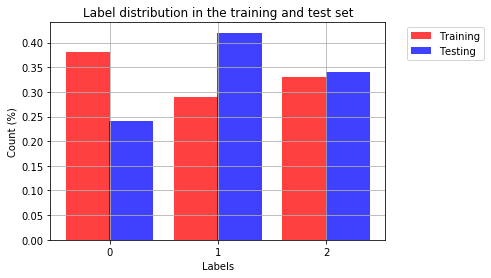

In [13]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

n_classes = 3

training_counts = [None] * n_classes 
testing_counts = [None] * n_classes
for i in range(n_classes):
    training_counts[i] = len(y_train[y_train == i])/len(y_train)
    testing_counts[i] = len(y_test[y_test == i])/len(y_test)

# the histogram of the data
train_bar = plt.bar(np.arange(n_classes)-0.2, training_counts, align='center', color = 'r', alpha=0.75, width = 0.41, label='Training')
test_bar = plt.bar(np.arange(n_classes)+0.2, testing_counts, align='center', color = 'b', alpha=0.75, width = 0.41, label = 'Testing')

plt.xlabel('Labels')
plt.xticks((0,1,2))
plt.ylabel('Count (%)')
plt.title('Label distribution in the training and test set')
plt.legend(bbox_to_anchor=(1.05, 1), handles=[train_bar, test_bar], loc=2)
plt.grid(True)
plt.show()

In [14]:
import keras

# The known number of output classes.
num_classes = 3

# Input image dimensions
input_shape = (4,)

# Convert class vectors to binary class matrices. This uses 1 hot encoding.
y_train_binary = keras.utils.to_categorical(y_train, num_classes)
y_test_binary = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.reshape(100, 4,1)
x_test = x_test.reshape(50, 4,1)

print(x_train.shape)

C:\Users\Karim\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


(100, 4, 1)


In [15]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Convolution2D,MaxPool2D
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras.models import model_from_json
from keras import backend as K

model = Sequential()
model.add(Conv1D(32, (3), input_shape=(4,1), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 195       
Total params: 4,483
Trainable params: 4,483
Non-trainable params: 0
_________________________________________________________________


In [16]:
batch_size = 128
epochs = 100
model.fit(x_train, y_train_binary,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test_binary))

Train on 100 samples, validate on 50 samples
Epoch 1/100
100/100 [==============================] - 0s 4ms/step - loss: 1.2888 - acc: 0.3300 - val_loss: 1.2917 - val_acc: 0.3400
Epoch 2/100
100/100 [==============================] - 0s 30us/step - loss: 1.2590 - acc: 0.3300 - val_loss: 1.2619 - val_acc: 0.3400
Epoch 3/100
100/100 [==============================] - 0s 60us/step - loss: 1.2294 - acc: 0.3300 - val_loss: 1.2335 - val_acc: 0.3400
Epoch 4/100
100/100 [==============================] - 0s 70us/step - loss: 1.2007 - acc: 0.3300 - val_loss: 1.2060 - val_acc: 0.3400
Epoch 5/100
100/100 [==============================] - 0s 70us/step - loss: 1.1720 - acc: 0.3300 - val_loss: 1.1791 - val_acc: 0.3400
Epoch 6/100
100/100 [==============================] - 0s 30us/step - loss: 1.1421 - acc: 0.3300 - val_loss: 1.1530 - val_acc: 0.3400
Epoch 7/100
100/100 [==============================] - 0s 40us/step - loss: 1.1117 - acc: 0.3300 - val_loss: 1.1273 - val_acc: 0.3400
Epoch 8/100
100/10

Epoch 62/100
100/100 [==============================] - 0s 40us/step - loss: 0.4097 - acc: 0.9200 - val_loss: 0.4841 - val_acc: 0.8200
Epoch 63/100
100/100 [==============================] - 0s 30us/step - loss: 0.4039 - acc: 0.9200 - val_loss: 0.4774 - val_acc: 0.8400
Epoch 64/100
100/100 [==============================] - 0s 30us/step - loss: 0.3982 - acc: 0.9300 - val_loss: 0.4719 - val_acc: 0.8400
Epoch 65/100
100/100 [==============================] - 0s 40us/step - loss: 0.3926 - acc: 0.9300 - val_loss: 0.4646 - val_acc: 0.8400
Epoch 66/100
100/100 [==============================] - 0s 30us/step - loss: 0.3872 - acc: 0.9500 - val_loss: 0.4601 - val_acc: 0.8400
Epoch 67/100
100/100 [==============================] - 0s 30us/step - loss: 0.3818 - acc: 0.9300 - val_loss: 0.4518 - val_acc: 0.8800
Epoch 68/100
100/100 [==============================] - 0s 30us/step - loss: 0.3767 - acc: 0.9500 - val_loss: 0.4495 - val_acc: 0.8400
Epoch 69/100
100/100 [==============================] -

In [17]:
from keras.layers import Input, Dense, Activation
from keras.models import Model

# This returns a tensor
inputs = Input(shape=(784,))
x = Dense(32, activation='tanh')(inputs)
#x = Dense(32)(x)
x = Activation('relu')(x)
predictions = Dense(8, activation='softmax')(x)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                25120     
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 264       
Total params: 25,384
Trainable params: 25,384
Non-trainable params: 0
_________________________________________________________________


In [19]:
df = pd.DataFrame(data={'shopify_customer_id': [1,1,2,3,4,5], 
                        'financial_status': ['paid', 'refunded', 'paid', 'refunded', 'paid', 'paid'],
                        'count': [8, 1, 13, 1, 1, 1], 
                        'order_amt': [19, 19, 0, 19, 0, 24]})

In [20]:
df

,count,financial_status,order_amt,shopify_customer_id
0,8,paid,19,1
1,1,refunded,19,1
2,13,paid,0,2
3,1,refunded,19,3
4,1,paid,0,4
5,1,paid,24,5


In [21]:
shopify_customers = {}
for i in df.iterrows():
    row = i[1]
    if row['shopify_customer_id'] not in shopify_customers:
        shopify_customers.update({row['shopify_customer_id']: 
                                  {'shopify_customer_id': row['shopify_customer_id'],
                                   'order_count_paid': 0,
                                   'order_count_refunded': 0,
                                   'order_amt_paid': 0,
                                   'order_amt_refunded': 0}})
    
    if row['financial_status'] == 'paid':
        shopify_customers[row['shopify_customer_id']]['order_count_paid'] += row['count']
        shopify_customers[row['shopify_customer_id']]['order_amt_paid'] += row['order_amt']
    
    elif row['financial_status'] == 'refunded':
        shopify_customers[row['shopify_customer_id']]['order_count_refunded'] += row['count']
        shopify_customers[row['shopify_customer_id']]['order_amt_refunded'] += row['order_amt']

In [22]:
data = [shopify_customers[i] for i in shopify_customers]

In [23]:
pd.DataFrame(data = [shopify_customers[i] for i in shopify_customers])

,order_amt_paid,order_amt_refunded,order_count_paid,order_count_refunded,shopify_customer_id
0,19,19,8,1,1
1,0,0,13,0,2
2,0,19,0,1,3
3,0,0,1,0,4
4,24,0,1,0,5


In [24]:
data = """city        store   units_sold  num_employees   cost_$
New York    A       10          4               11000
New York    B       12          4               11890
New York    C       14          5               15260
New York    D       17          6               17340
London      A       23          5               22770
London      B       27          6               25650
London      C       22          3               21450
Paris       A       4           2               5200
Paris       B       7           3               9590"""

In [25]:
import pandas as pd

data = {'city': ['New York', 'New York', 'New York', 'New York', 'London', 'London', 'London', 'Paris', 'Paris'],
        'store': ['A', 'B', 'C', 'D', 'A', 'B', 'C', 'A', 'B'],
        'units_sold': [10, 12, 14, 17, 23, 27, 22, 4, 7],
        'num_employees': [4,4,5,6,5,6,3,2,3],
        'cost': [11000, 11890, 15260, 17340, 22770, 25650, 21450, 5200, 9560]}

df = pd.DataFrame(data)

df['store'] =df['store'].astype('category').cat.codes
df['city'] =df['city'].astype('category').cat.codes

In [26]:
df

,city,cost,num_employees,store,units_sold
0,1,11000,4,0,10
1,1,11890,4,1,12
2,1,15260,5,2,14
3,1,17340,6,3,17
4,0,22770,5,0,23
5,0,25650,6,1,27
6,0,21450,3,2,22
7,2,5200,2,0,4
8,2,9560,3,1,7


In [152]:
import matplotlib.pyplot as plt

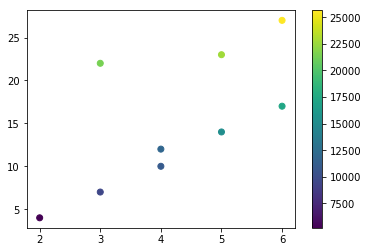

In [160]:
plt.scatter(df['num_employees'], df['units_sold'], c = df['cost'])
plt.colorbar()
plt.show()

In [164]:
df

,city,cost,num_employees,store,units_sold
0,1,11000,4,0,10
1,1,11890,4,1,12
2,1,15260,5,2,14
3,1,17340,6,3,17
4,0,22770,5,0,23
5,0,25650,6,1,27
6,0,21450,3,2,22
7,2,5200,2,0,4
8,2,9560,3,1,7


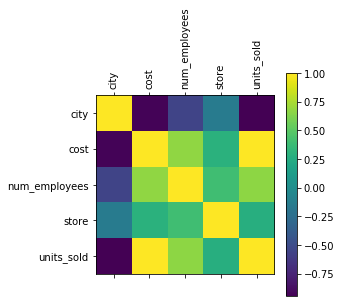

In [171]:
plt.matshow(df.corr())
plt.xticks(np.arange(5), df.columns, rotation=90)
plt.yticks(np.arange(5), df.columns, rotation=0)
plt.colorbar()
plt.show()

In [172]:
import numpy as np

In [173]:
X = np.asarray(df[['city', 'num_employees', 'store', 'units_sold']])
Y = np.asarray(df['cost'])

In [319]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)

X_train


array([[ 0,  3,  2, 22],
       [ 2,  3,  1,  7],
       [ 1,  6,  3, 17],
       [ 1,  4,  0, 10],
       [ 2,  2,  0,  4],
       [ 1,  4,  1, 12]], dtype=int64)

In [346]:
scores = []
coefs = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)
    lineReg = LinearRegression()
    lineReg.fit(X_train, y_train)
    scores.append(lineReg.score(X_test, y_test))
    coefs.append(lineReg.coef_)
print('Linear Regression')
print(np.mean(scores))
print(np.mean(coefs, axis=0))

scores = []
coefs = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)
    lineReg = linear_model.Ridge (alpha = .5)
    lineReg.fit(X_train, y_train)
    scores.append(lineReg.score(X_test, y_test))
    coefs.append(lineReg.coef_)
print('\nRidge Regression')
print(np.mean(scores))
print(np.mean(coefs, axis=0))

Linear Regression
-1.43683760609
[ 1284.47358731  1251.8762943   -706.31897708   846.5465552 ]

Ridge Regression
0.900877146134
[ 228.05312491   95.33306385  123.49517018  873.49803782]


Score:  0.963554136721
Weights:  [ 506.87136393  -15.48157725  376.79379444  920.01939237]


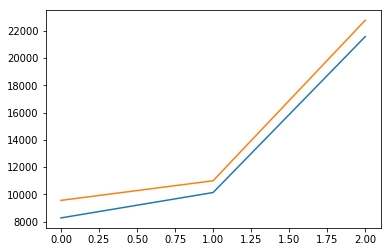

In [347]:
from sklearn.linear_model import LinearRegression

lineReg = LinearRegression()
lineReg.fit(X_train, y_train)
print('Score: ', lineReg.score(X_test, y_test))
print('Weights: ', lineReg.coef_)

plt.plot(lineReg.predict(X_test))
plt.plot(y_test)
plt.show()

In [351]:
reg.predict([[2,  4,  1,  12]])

array([ 12853.2132658])

Score:  0.971197683706
Weights:  [ 129.78467277    2.034588     97.11724313  877.73906409]


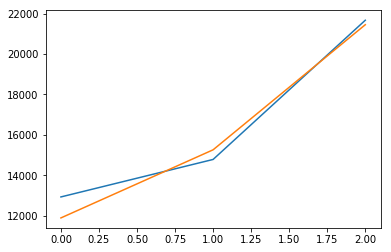

In [342]:
from sklearn import linear_model
reg = linear_model.Ridge (alpha = .5)
reg.fit(X_train, y_train)
print('Score: ', reg.score(X_test, y_test))
print('Weights: ', reg.coef_)

plt.plot(reg.predict(X_test))
plt.plot(y_test)
plt.show()

Score:  0.96360893404
Weights:  [ 498.32779961  -14.20197462  376.12969716  919.12624418]


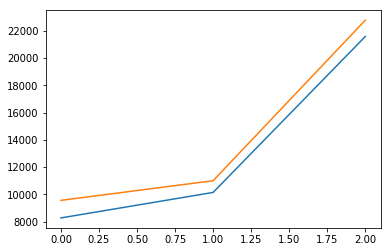

In [348]:
reg = linear_model.Lasso(alpha = 0.1)
reg.fit(X_train, y_train)
print('Score: ', reg.score(X_test, y_test))
print('Weights: ', reg.coef_)

plt.plot(reg.predict(X_test))
plt.plot(y_test)
plt.show()

Score:  0.516005206052


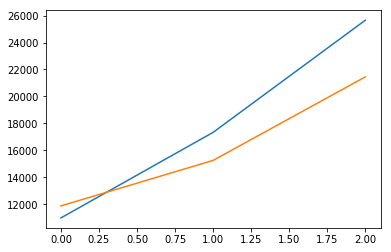

In [344]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=3)
reg.fit(X_train, y_train)
print('Score: ', reg.score(X_test, y_test))

plt.plot(reg.predict(X_test))
plt.plot(y_test)
plt.show()

In [357]:
from sklearn.datasets.samples_generator import make_blobs
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
X, y = make_blobs(n_samples=100, centers=2, n_features=3)
# scatter plot, dots colored by class value


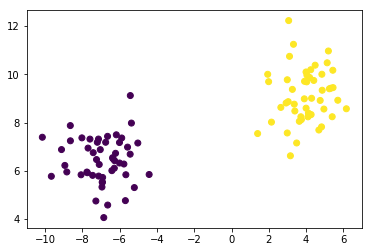

In [361]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

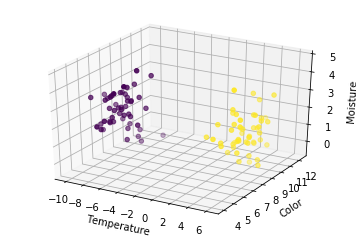

In [364]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0], X[:,1], X[:,2], c=y)

ax.set_xlabel('Temperature')
ax.set_ylabel('Color')
ax.set_zlabel('Moisture')

plt.show()

In [491]:
np.random.normal(96, 2)

95.1744988962199

In [443]:
np.random.randint(0,10)

5

In [519]:
import numpy as np

# Number of samples
n = 100

data = []
for i in range(n):
    temp = {}
    
    # Get a random normally distributed temperature mean=14 and variance=3
    temp.update({'temperature': np.random.normal(14, 3)})
    
    # Get a color with 80% probability green, 10% probability yellow
    # and 10% probability purple
    color = 'green'
    color_random_value = np.random.randint(0,10)
    if color_random_value == 8:
        color = 'yellow'
    elif color_random_value == 9:
        color = 'purple'
    temp.update({'color': color})
    
    # Get a random normally distributed moisture mean=96 and variance=2
    temp.update({'moisture': np.random.normal(96, 2)})
    
    # Verify if the instance is edible (label=0) or not (label=1)
    label = 0
    if temp['temperature'] < 10 or temp['temperature'] > 18:
        label = 1
    elif temp['color'] != 'green':
        label = 1
    elif temp['moisture'] < 94 or temp['moisture'] > 98:
        label = 1
    temp.update({'label': label})
    
    data.append(temp)

In [520]:
df = pd.DataFrame(data=data)
df.head()

,color,label,moisture,temperature
0,green,1,98.994606,12.896986
1,green,0,94.092764,14.514363
2,green,0,94.988866,15.869838
3,green,0,95.938690,13.922931
4,green,0,95.802181,10.350308


In [543]:
from numpy.random import choice
draw = choice(['green', 'yellow', 'purple'], 100, p=[0.8, 0.1, 0.1])
draw

array(['green', 'yellow', 'green', 'green', 'green', 'green', 'green',
       'green', 'green', 'green', 'green', 'green', 'green', 'purple',
       'green', 'green', 'green', 'green', 'green', 'green', 'green',
       'yellow', 'green', 'green', 'green', 'green', 'green', 'green',
       'green', 'green', 'green', 'green', 'yellow', 'green', 'green',
       'green', 'green', 'green', 'green', 'green', 'green', 'green',
       'green', 'green', 'green', 'green', 'green', 'green', 'purple',
       'green', 'green', 'green', 'yellow', 'green', 'yellow', 'green',
       'purple', 'green', 'green', 'purple', 'green', 'green', 'green',
       'green', 'green', 'yellow', 'yellow', 'green', 'green', 'green',
       'green', 'green', 'purple', 'green', 'yellow', 'green', 'green',
       'purple', 'green', 'green', 'green', 'yellow', 'purple', 'green',
       'green', 'green', 'green', 'purple', 'green', 'green', 'green',
       'green', 'green', 'green', 'green', 'green', 'green', 'green',
   

In [554]:
import numpy as np

n = 100

data = {'temperature': np.random.normal(14, 3, n),
        'moisture': np.random.normal(96, 2, n),
        'color': np.random.choice(['green', 'yellow', 'purple'], 
                                  size=100, 
                                  p=[0.8, 0.1, 0.1])}
df = pd.DataFrame(data=data)

In [555]:
def get_label(color, moisture, temperature):
    if temperature < 10 or temperature > 18:
        return 1
    elif color != 'green':
        return 1
    elif moisture < 94 or moisture > 98:
        return 1
    return 0

df['label'] = df.apply(lambda row: get_label(row['color'], 
                                             row['moisture'], 
                                             row['temperature']), axis=1)

In [556]:
df.head()

,color,moisture,temperature,label
0,green,98.155906,12.446165,1
1,yellow,95.425176,16.597386,1
2,green,95.600811,17.033967,0
3,green,97.756570,15.595215,0
4,green,97.441059,11.057950,0


In [557]:
df['color_codes'] =df['color'].astype('category').cat.codes

In [563]:
X = np.asarray(df[['color_codes', 'moisture', 'temperature']])
y = np.asarray(df['label'])

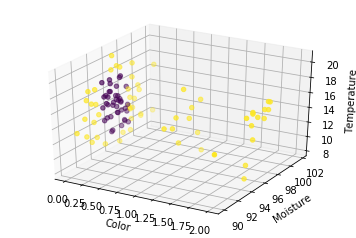

In [573]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0], X[:,1], X[:,2], c=y)

ax.set_xlabel('Color')
ax.set_ylabel('Moisture')
ax.set_zlabel('Temperature')

plt.show()

In [564]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

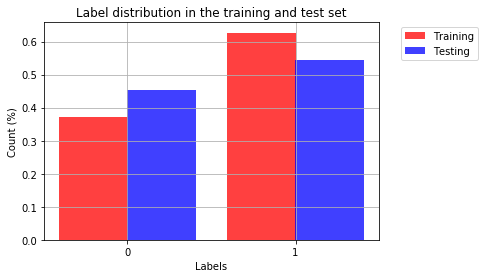

In [565]:
import matplotlib.pyplot as plt
%matplotlib inline

n_classes = 2

training_counts = [None] * n_classes 
testing_counts = [None] * n_classes
for i in range(n_classes):
    training_counts[i] = len(y_train[y_train == i])/len(y_train)
    testing_counts[i] = len(y_test[y_test == i])/len(y_test)

# the histogram of the data
train_bar = plt.bar(np.arange(n_classes)-0.2, training_counts, align='center', color = 'r', alpha=0.75, width = 0.41, label='Training')
test_bar = plt.bar(np.arange(n_classes)+0.2, testing_counts, align='center', color = 'b', alpha=0.75, width = 0.41, label = 'Testing')

plt.xlabel('Labels')
plt.xticks((0,1))
plt.ylabel('Count (%)')
plt.title('Label distribution in the training and test set')
plt.legend(bbox_to_anchor=(1.05, 1), handles=[train_bar, test_bar], loc=2)
plt.grid(True)
plt.show()

In [574]:
from sklearn import linear_model
clf = linear_model.SGDClassifier(max_iter=1000)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.54545454545454541

In [566]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.72727272727272729

In [567]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
neigh.score(X_test, y_test)

0.66666666666666663

In [568]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

1.0

In [569]:
from sklearn.ensemble import RandomForestClassifier 

forest = RandomForestClassifier(n_estimators = 100)

forest.fit(X_train, y_train)
print('Score: ', forest.score(X_test, y_test))
predictions = forest.predict(X_test)

Score:  1.0


array([[ 100.,    0.],
       [   0.,  100.]])

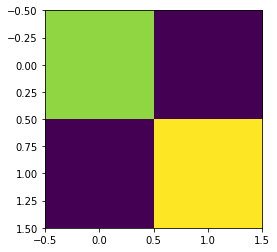

In [570]:
from sklearn.metrics import confusion_matrix

# Show a confusion matrix
plt.imshow(confusion_matrix(y_test, predictions))
conf = confusion_matrix(y_test, predictions)

# Print the confusion matrix
np.round([conf[ix, :]*100/i for ix, i in enumerate(np.sum(conf, 1))], 3)

In [575]:
Y = [100, 90, 100, 90]
Y_p = [10, 10, 10, 10]

In [590]:
np.sqrt(np.sum(np.subtract(Y, Y_p)**2)/len(Y))

85.14693182963201

In [580]:
np.sqrt(sum((Y-Y_p)**2)/len(Y))

TypeError: unsupported operand type(s) for -: 'list' and 'list'

In [597]:
data = np.random.normal(170, 15, 10000)

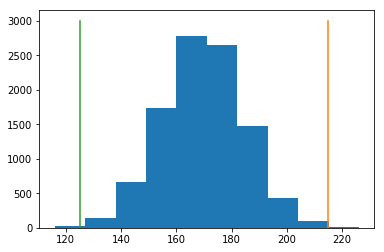

In [634]:
import numpy as np

data = np.random.normal(170, 15, 10000)

plt.hist(data)
plt.plot([215,215],[0,3000])
plt.plot([125,125],[0,3000])
plt.show()

In [599]:
170+45

215

In [600]:
170-45

125

In [608]:
estimator.fit(X_train)
estimator.predict(X_test)

NameError: name 'estimator' is not defined

In [615]:
from sklearn.covariance import EllipticEnvelope
estimator = EllipticEnvelope()
estimator.fit(data.reshape(-1,1))

EllipticEnvelope(assume_centered=False, contamination=0.1, random_state=None,
         store_precision=True, support_fraction=None)

In [617]:
print(data)
estimator.predict(data.reshape(-1,1))

[ 153.09813252  153.71807038  176.12957608 ...,  169.00151567  167.14363514
  153.73279926]


array([1, 1, 1, ..., 1, 1, 1])

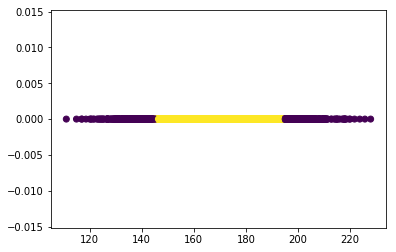

In [624]:
plt.scatter(data, np.random.randint(0,1,10000), c=estimator.predict(data.reshape(-1,1)))
plt.show()

In [625]:
estimator.decision_function(data.reshape(-1,1))

array([ 0.33599947,  0.36405112,  0.86789717, ...,  1.32406999,
        1.13683563,  0.36472203])

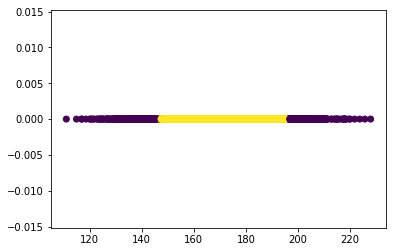

In [633]:
from sklearn.ensemble import IsolationForest
estimator = IsolationForest()
estimator.fit(data.reshape(-1,1))
plt.scatter(data, np.random.randint(0,1,10000), c=estimator.predict(data.reshape(-1,1)))
plt.show()

In [632]:
list(predictions)

[ExtraTreeRegressor(criterion='mse', max_depth=8, max_features=1,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, random_state=1188395678,
           splitter='random'),
 ExtraTreeRegressor(criterion='mse', max_depth=8, max_features=1,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, random_state=977457431,
           splitter='random'),
 ExtraTreeRegressor(criterion='mse', max_depth=8, max_features=1,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, random_state=1832004833,
           splitter='random'),
 ExtraTreeRegressor(criterion='mse', max_depth=8, max_features=1,
           max_leaf_nodes=None, min_im

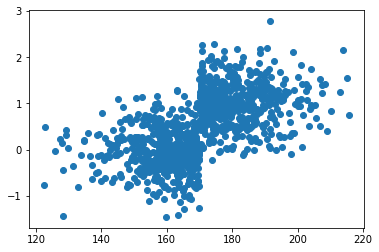

In [688]:
import numpy as np

n = 1000
X = np.zeros((n,2))
X[:,0] = np.random.normal(170, 15, n)
for i in range(n):
    if X[i,0] < 170:
        X[i,1] = np.random.normal(0, 0.5)
    else:
        X[i,1] = np.random.normal(1, 0.5)

plt.scatter(X[:,0], X[:,1])
plt.show()

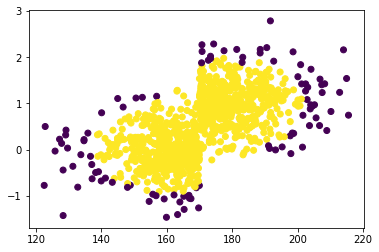

In [689]:
from sklearn.ensemble import IsolationForest
estimator = IsolationForest()
estimator.fit(X)
plt.scatter(X[:,0], X[:,1], c=estimator.predict(X))
plt.show()

In [690]:
estimator.predict([[200, 0]])

array([-1])

In [691]:
from sklearn.covariance import EllipticEnvelope
estimator = EllipticEnvelope()
estimator.fit(X)

EllipticEnvelope(assume_centered=False, contamination=0.1, random_state=None,
         store_precision=True, support_fraction=None)

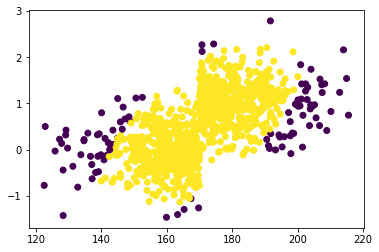

In [693]:
plt.scatter(X[:,0], X[:,1], c=estimator.predict(X))
plt.show()

In [694]:
estimator.score_samples(X)

AttributeError: 'EllipticEnvelope' object has no attribute 'score_samples'

TypeError: score() missing 1 required positional argument: 'y'

In [683]:
X.shape

(100, 2)

In [697]:
from sklearn.neighbors import kneighbors_graph
A = kneighbors_graph(X, n_neighbors=100, mode='distance', include_self=False)
A.toarray()

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.17948527],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.17948527, ...,  0.        ,
         0.        ,  0.        ]])

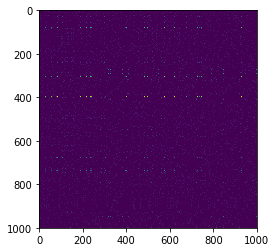

In [698]:
plt.imshow(A.toarray())
plt.show()

In [726]:
data = {'Loan ID': ['LP001002', 'LP001003', 'LP001005', 'LP001006', 'LP001008'],
        'Married': ['No', 'Yes', 'Yes', 'Yes', 'No'],
        'Dependents': [0, 1, 0, 0, 0],
        'Education': ['Graduate', 'Graduate', 'Graduate', 'Not Graduate', 'Graduate'],
        'Self_Employed': ['No', 'No', 'Yes', 'No', 'No'],
        'Income': [5849, 4583, 3000, 2583, 6000],
        'Coapplicant Income': [0, 1508, 0, 2358, 0],
        'LoanAmount': [123, 128, 66, 120, 141],
        'Area': ['Urban', 'Rural', 'Urban', 'Urban', 'Urban'],
        'Loan Status': ['Y', 'N', 'Y', 'Y', 'Y']} 

In [727]:
df = pd.DataFrame(data)
df['Married'] =df['Married'].astype('category').cat.codes
df['Education'] =df['Education'].astype('category').cat.codes
df['Self_Employed'] =df['Self_Employed'].astype('category').cat.codes
df['Area'] =df['Area'].astype('category').cat.codes
df['Loan Status'] =df['Loan Status'].astype('category').cat.codes

df

,Area,Coapplicant Income,Dependents,Education,Income,Loan ID,Loan Status,LoanAmount,Married,Self_Employed
0,1,0,0,0,5849,LP001002,1,123,0,0
1,0,1508,1,0,4583,LP001003,0,128,1,0
2,1,0,0,0,3000,LP001005,1,66,1,1
3,1,2358,0,1,2583,LP001006,1,120,1,0
4,1,0,0,0,6000,LP001008,1,141,0,0


In [728]:
df.corr()

,Area,Coapplicant Income,Dependents,Education,Income,Loan Status,LoanAmount,Married,Self_Employed
Area,1.000000,-0.373229,-1.000000,0.250000,-0.063785,1.000000,-0.240130,-0.408248,0.250000
Coapplicant Income,-0.373229,1.000000,0.373229,0.804972,-0.578869,-0.373229,0.228787,0.641332,-0.392734
Dependents,-1.000000,0.373229,1.000000,-0.250000,0.063785,-1.000000,0.240130,0.408248,-0.250000
Education,0.250000,0.804972,-0.250000,1.000000,-0.644935,0.250000,0.085207,0.408248,-0.250000
Income,-0.063785,-0.578869,0.063785,-0.644935,1.000000,-0.063785,0.631753,-0.880442,-0.497167
Loan Status,1.000000,-0.373229,-1.000000,0.250000,-0.063785,1.000000,-0.240130,-0.408248,0.250000
LoanAmount,-0.240130,0.228787,0.240130,0.085207,0.631753,-0.240130,1.000000,-0.518624,-0.960519
Married,-0.408248,0.641332,0.408248,0.408248,-0.880442,-0.408248,-0.518624,1.000000,0.408248
Self_Employed,0.250000,-0.392734,-0.250000,-0.250000,-0.497167,0.250000,-0.960519,0.408248,1.000000


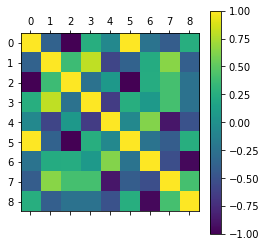

In [748]:
plt.matshow(df.corr())
plt.colorbar()
plt.show()

In [798]:
df[df.columns[1:]].corr()['LoanAmount'][:]

Coapplicant Income    0.228787
Dependents            0.240130
Education             0.085207
Income                0.631753
Loan Status          -0.240130
LoanAmount            1.000000
Married              -0.518624
Self_Employed        -0.960519
Name: LoanAmount, dtype: float64

In [803]:
df[['Income', 'Education', 'LoanAmount']].corr()['LoanAmount'][:]

Income        0.631753
Education     0.085207
LoanAmount    1.000000
Name: LoanAmount, dtype: float64

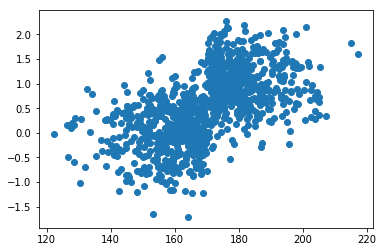

In [776]:
import numpy as np

n = 1000
X = np.zeros((n,3))
Y = np.zeros((n,))
X[:,0] = np.random.normal(170, 15, n)
for i in range(n):
    if X[i,0] < 170:
        X[i,1] = np.random.normal(0, 0.5)
        Y[i] = 0
    else:
        X[i,1] = np.random.normal(1, 0.5)
        Y[i] = 1
X[:,2] = 1

plt.scatter(X[:,0], X[:,1])
plt.show()

In [777]:
w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
w

array([ 0.01959013,  0.25289765, -2.9584101 ])

In [778]:
y1 = 0
y2 = 0


(1000, 3)

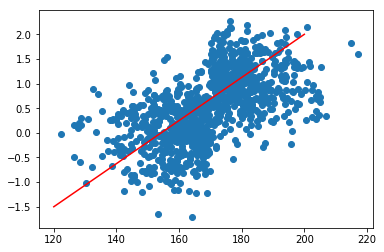

In [786]:
yhat = X.dot(w)
plt.scatter(X[:,0], X[:,1])
plt.plot([120, 200], [-1.5, 2], color='red')
plt.show()

In [804]:
data = {'mm': ['JUl', 'Jul', 'Jul', 'Jul'],
        'dd': ['5', '5', '5', '5'],
        'time': ['2:48:29', '2:48:29', '2:48:29', '2:50:47'],
        'yyyy': ['2018', '2018', '2018', '2018']}

In [807]:
df = pd.DataFrame(data)
df

,dd,mm,time,yyyy
0,5,JUl,2:48:29,2018
1,5,Jul,2:48:29,2018
2,5,Jul,2:48:29,2018
3,5,Jul,2:50:47,2018


In [817]:
df['formatted_datetime'] = pd.to_datetime(df['dd'] + '/' + df['mm'] + '/' + df['yyyy'] + ' T' + df['time'])
df

,dd,mm,time,yyyy,formatted_datetime
0,5,JUl,2:48:29,2018,2018-07-05 02:48:29
1,5,Jul,2:48:29,2018,2018-07-05 02:48:29
2,5,Jul,2:48:29,2018,2018-07-05 02:48:29
3,5,Jul,2:50:47,2018,2018-07-05 02:50:47


In [815]:
df['dd'] + '/' + df['mm'] + '/' + df['yyyy'] + ' T' + df['time']

0    5/JUl/2018 T2:48:29
1    5/Jul/2018 T2:48:29
2    5/Jul/2018 T2:48:29
3    5/Jul/2018 T2:50:47
dtype: object

In [847]:
data = {'mm': ['JUl', 'Jul', 'Jul', 'Jul'],
        'dd': ['5', '5', '5', '5'],
        'time': ['2:48:29', '2:48:29', '2:48:29', '2:50:47'],
        'yyyy': ['2018', '2018', '2018', '2018'],
        'dev': ['aaa', 'aaa', 'aaa', 'bbb']}

df = pd.DataFrame(data)
df['formatted_datetime'] = pd.to_datetime(df['dd'] + '/' + df['mm'] + '/' + 
                                          df['yyyy'] + ' T' + df['time'])

df['dev'] =df['dev'].astype('category')
categorie_codes = dict(enumerate(df['dev'].cat.categories))
df['dev'] =df['dev'].cat.codes

df

,dd,dev,mm,time,yyyy,formatted_datetime
0,5,0,JUl,2:48:29,2018,2018-07-05 02:48:29
1,5,0,Jul,2:48:29,2018,2018-07-05 02:48:29
2,5,0,Jul,2:48:29,2018,2018-07-05 02:48:29
3,5,1,Jul,2:50:47,2018,2018-07-05 02:50:47


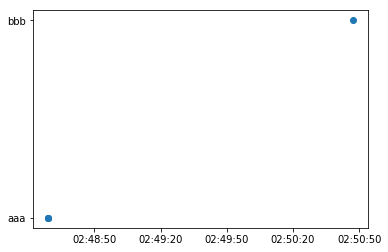

In [848]:
plt.plot_date(df['formatted_datetime'], df['dev'])
plt.yticks(range(len(categorie_codes)), list(categorie_codes.values()))
plt.show()

In [849]:
dict(enumerate(df['dev'].astype('category').cat.categories))

{0: 0, 1: 1}

In [852]:
from bs4 import BeautifulSoup
import requests

In [893]:
url = 'https://www.indeed.com/jobs?q=data+scientist+$20,000&l=New+York&start=10'

In [894]:
response = requests.get(url)
soup = BeautifulSoup(response.content, 'lxml')

In [864]:
soup.find_all('div', {'class': 'row result clickcard'})

[]

In [869]:
len(soup.find_all('div', {'class': 'row'}))

16

In [905]:
data = []
for i in soup.find_all('div', {'class': 'row'}):
    job_title = i.find('a', {'data-tn-element': 'jobTitle'})['title']
    company_name = i.find('span', {'class': 'company'}).text.strip()    
    job_summary = ''.join([j.text.strip() for j in i.find_all('span', 
                                                              {'class': 'summary'})])
    location = i.find('span', {'class': 'location'})
    if location is not None:
        location = location.text.strip()
    
    salary_range = i.find('span', {'class': 'no-wrap'})
    if salary_range is not None:
        salary_range = salary_range.text.strip()
    
    
    datum = {'job_title': job_title,
             'company_name': company_name,
             'job_summary': job_summary,
             'location': location,
             'salary_range': salary_range}
    
    data.append(datum)

df = pd.DataFrame(data)

df.head()

,company_name,job_summary,job_title,location,salary_range
0,Biz2Credit Inc.,"As a Biz2Credit Data Scientist, you will shape...",Data Scientist,None,"$50,000 - $65,000 a year"
1,05 Ascensia Diabetes Care US Inc.,Experience in and understanding of data and in...,Data Scientist,None,None
2,Fora Financial LLC,A Day in the Life of a Data Scientist:. Identi...,Data Scientist,None,None
3,Bloomberg,The infrastructure and algorithms we develop a...,AI Research Scientist,None,None
4,Twitter,"The team is made up of designers, creative tec...",Insights Data Scientist,"New York, NY",None


In [902]:
data

{'company_name': 'Chembio Diagnostic Systems, Inc.',
 'job_summary': 'The Junior Scientist is responsible for performing experiments to develop and refine state-of-the-art assays for the detection of infectious diseases....',
 'job_title': 'R&D Scientist, Jr.',
 'location': None,
 'salary_range': None}